In [7]:
import numpy as np

import random

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)



# Classifier

## Dataset

In [8]:
random.seed(331)

sigma = 0.06
cov = [[sigma, 0], [0, sigma]]
nb = 50

mean_0 = [0, 0]
x_0, y_0 = np.random.multivariate_normal(mean_0, cov, nb).T

mean_1 = [0, 1]
x_1, y_1 = np.random.multivariate_normal(mean_1, cov, nb).T

mean_2 = [1, 1]
x_2, y_2 = np.random.multivariate_normal(mean_2, cov, nb).T


mean_3 = [1, 0]
x_3, y_3 = np.random.multivariate_normal(mean_3, cov, nb).T



In [9]:
x_temp = list(x_0) + list(x_1) + list(x_2) + list(x_3)
y_temp = list(y_0) + list(y_1) + list(y_2) + list(y_3)

X = np.transpose(np.array([x_temp, y_temp]))
y = np.array([True for i in range(nb)] + [False for i in range(nb)] + [True for i in range(nb)] + [False for i in range(nb)])
Y = np.transpose(np.array([y, ~y]))


In [10]:
X.shape, Y.shape

((200, 2), (200, 2))

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((134, 2), (66, 2), (134, 2), (66, 2))

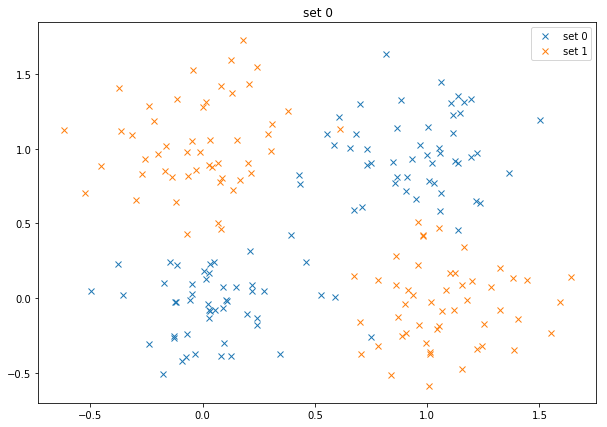

In [12]:
plt.figure()
plt.title('set 0')
plt.plot(X[Y[:,0]][:,0], X[Y[:,0]][:,1], 'x', label='set 0')
plt.plot(X[Y[:,1]][:,0], X[Y[:,1]][:,1], 'x', label='set 1')
plt.legend()
plt.show()


## Model definition

In [20]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model fit

In [21]:
model.fit(X_train, Y_train, batch_size=1, epochs=100)


Epoch 1/100
134/134 [==============================] - 1s 6ms/step - loss: 0.7017 - acc: 0.5672
Epoch 2/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6817 - acc: 0.6642
Epoch 3/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6600 - acc: 0.7164
Epoch 4/100
134/134 [==============================] - 0s 2ms/step - loss: 0.6336 - acc: 0.7351
Epoch 5/100
134/134 [==============================] - 0s 2ms/step - loss: 0.5932 - acc: 0.7724
Epoch 6/100
134/134 [==============================] - 0s 3ms/step - loss: 0.5504 - acc: 0.8246
Epoch 7/100
134/134 [==============================] - 0s 3ms/step - loss: 0.5044 - acc: 0.8731
Epoch 8/100
134/134 [==============================] - 1s 8ms/step - loss: 0.4540 - acc: 0.9067A: 2s - loss: 0.4
Epoch 9/100
134/134 [==============================] - 1s 4ms/step - loss: 0.4018 - acc: 0.9179
Epoch 10/100
134/134 [==============================] - 0s 3ms/step - loss: 0.3553 - acc: 0.8993
Epoch 11/100
134/134 [

134/134 [==============================] - 0s 3ms/step - loss: 0.0805 - acc: 0.9627
Epoch 85/100
134/134 [==============================] - 0s 3ms/step - loss: 0.0756 - acc: 0.9664
Epoch 86/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0766 - acc: 0.9701
Epoch 87/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0737 - acc: 0.9627
Epoch 88/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0799 - acc: 0.9701
Epoch 89/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0746 - acc: 0.9627
Epoch 90/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0782 - acc: 0.9627
Epoch 91/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0802 - acc: 0.9664
Epoch 92/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0735 - acc: 0.9664
Epoch 93/100
134/134 [==============================] - 0s 2ms/step - loss: 0.0722 - acc: 0.9701
Epoch 94/100
134/134 [=====================

In [22]:
print('Train: ', model.evaluate(X_train, Y_train))
print('Test: ', model.evaluate(X_test, Y_test))


134/134 [==============================] - 0s 867us/step
Train:  [0.0660994688966381, 0.9626865662745575]
66/66 [==============================] - 0s 395us/step
Test:  [0.13789093527267335, 0.9393939393939394]


## Predictions

In [23]:
x_min = np.min(X[:,0]) - 1
x_max = np.max(X[:,0]) + 1

y_min = np.min(X[:,1]) - 1
y_max = np.max(X[:,1]) + 1

h = 0.5


In [24]:
x_ok, y_ok = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


In [25]:
Y_pred = model.predict(np.transpose(np.array([x_ok.ravel(), y_ok.ravel()])))


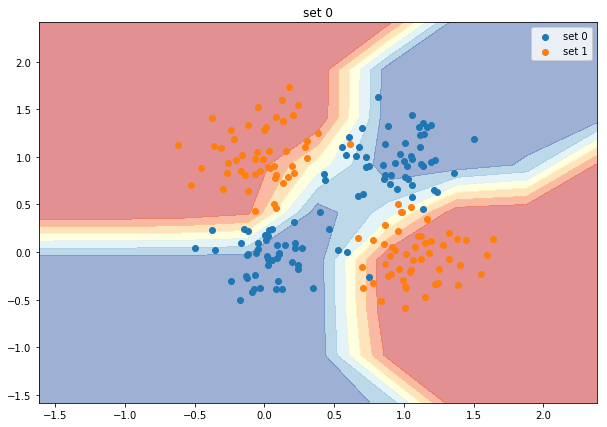

In [26]:
plt.figure()
plt.title('set 0')
plt.contourf(x_ok, y_ok, Y_pred[:,0].reshape(x_ok.shape), cmap='RdYlBu', alpha=0.5)
plt.scatter(X[Y[:,0]][:,0], X[Y[:,0]][:,1], label='set 0')
plt.scatter(X[Y[:,1]][:,0], X[Y[:,1]][:,1], label='set 1')
plt.legend()
plt.show()
